In [6]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin';os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']


import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
import pylab
import calendar
from scipy import stats
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import  preprocessing, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
import xgboost as xgb
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, log_loss


C:\Users\VikasDesktop\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
#train_df = pd.read_json("E:/GA_TECH_DataMining/project/train.json")
#type(train_df)
train_df1 = pd.read_csv("E:/GA_TECH_DataMining/project/Final_Project_Variables - combined.csv")

#train_df = train_df1[train_df1.interest_code.notnull()]
#train_df.head()
#train_df.features.head(10)
#df = train_df.features.to_frame
#type(df)
#train_df.features.index

In [8]:
test_df = train_df1[train_df1.interest_code.isnull()]
train_df = train_df1[train_df1.interest_code.notnull()]



In [163]:
train_df1.interest_code.value_counts(dropna=False)

NaN     74659
 1.0    34284
 2.0    11229
 3.0     3839
Name: interest_code, dtype: int64

In [5]:
test_df.head()
train_df.shape
test_df.shape

(74659, 825)

In [232]:
train_df.iloc[:,1:2].head()

,listing_id
4,7170325
6,7092344
9,7158677
10,7211212
15,7225292


In [9]:
X = train_df.iloc[:,3:50]
X.index = train_df['listing_id']
train_y = train_df["interest_code"]
from sklearn.preprocessing import LabelBinarizer
X.head()
#encoder = LabelBinarizer()
#train_y = encoder.fit_transform(y)
#train_y = transformed_y.transform(y)
#target_num_map = {'high':0, 'medium':1, 'low':2}
#train_y = np.array(train_df['interest_level'].apply(lambda x: target_num_map[x]))
#X.head()
#y.head()
#train_y

,days_between_adj_5,log_price_adj_3,interest_adj_13,feature_count_adj_25,bathrooms_adj_4,descript_len_adj_11,bedrooms_adj_3,mgmt_list_count,feature_count,descript_len,...,Gym,Parking,Storage,Sunlight,Pool,Laundry_Room,Wash_Dry,Dishwasher,Prewar,AirCon
listing_id,,,,,,,,,,,,,,,,,,,,,
7170325,1318,23.485804,19,130,4.0,5398,4,294,7,530,...,0,0,0,0,0,1,0,1,1,0
7092344,1173,24.941265,18,168,6.0,7174,7,64,6,804,...,0,0,0,0,0,1,0,1,0,0
7158677,1170,24.302001,21,127,4.0,6583,5,265,6,776,...,0,0,0,0,0,1,1,1,0,0
7211212,1189,23.654460,15,46,4.5,5388,5,235,0,565,...,0,0,0,0,0,0,0,0,0,0
7225292,1207,25.326354,17,195,6.0,6230,5,135,4,321,...,1,0,0,0,0,1,0,0,0,0


In [10]:
Xtest = test_df.iloc[:,3:50]
Xtest.index = test_df['listing_id']
Xtest.head()

,days_between_adj_5,log_price_adj_3,interest_adj_13,feature_count_adj_25,bathrooms_adj_4,descript_len_adj_11,bedrooms_adj_3,mgmt_list_count,feature_count,descript_len,...,Gym,Parking,Storage,Sunlight,Pool,Laundry_Room,Wash_Dry,Dishwasher,Prewar,AirCon
listing_id,,,,,,,,,,,,,,,,,,,,,
7142618,1397,23.934492,19,88,4.0,8647,3,62,6,564,...,0,0,0,0,0,1,1,1,0,0
7210040,1168,23.829505,20,45,4.0,4485,4,26,3,245,...,0,0,0,0,0,0,0,0,1,0
7174566,1200,23.215464,18,58,3.0,4695,0,6387,3,268,...,0,0,0,0,0,0,0,0,1,0
7191391,1153,23.811156,16,53,4.0,3095,3,306,3,123,...,0,0,0,0,0,0,0,0,0,0
7171695,1178,23.638737,20,201,4.0,8351,1,60,10,541,...,1,0,0,0,0,1,0,0,1,0


In [11]:
target_num_map = {1:0, 2:1, 3:2}
train_y = np.array(train_df['interest_code'].apply(lambda x: target_num_map[x]))
train_y.max()

2

In [9]:

#learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
#n_estimators = [100, 200]
#learning_rate =0.1
#max_depth=5
#min_child_weight=1, 
#gamma=0, 
#subsample=0.8, 
#colsample_bytree=0.8,
#objective= 'binary:logistic', 
#nthread=4, 
#scale_pos_weight=1, 
#seed=27)
#param_grid = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
 #             'n_estimators' : [20, 50, 100]}
param_grid = {'max_depth': [3,5,7],
              'min_child_weight' : [1,3,5]
             }
 

param_fixed = { 'objective' : 'multi:softprob'
              }


In [ ]:
model = XGBClassifier(objective='multi:softprob',nthread=10, seed=27, learning_rate=0.001, n_estimators=1600)
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, scoring="neg_log_loss", cv=10)
grid_result = grid_search.fit(X, train_y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
grid_result.return_train_score
# plot
#plt.errorbar(learning_rate, means, yerr=stds)
#plt.title("XGBoost learning_rate vs Log Loss")
#plt.xlabel('learning_rate')
#plt.ylabel('Log Loss')

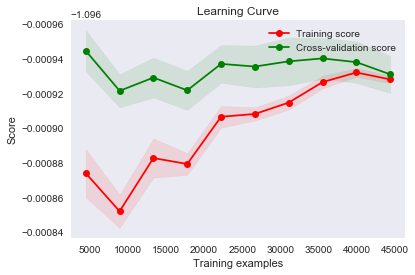

In [273]:
estimator = XGBClassifier(objective='multi:softprob',learning_rate= 0.0001,seed=27,n_estimators=30)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, train_y, cv=cv, scoring="neg_log_loss", n_jobs=-1, train_sizes=np.linspace(.1,1., 10))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [268]:
#train_y.max()
#train_y1 = np.array(train_y,dtype=int)
#train_y1


<bound method StratifiedKFold.split of StratifiedKFold(n_splits=10, random_state=7, shuffle=True)>

In [40]:
dtrain = xgb.DMatrix(data=X, label=train_y)
#params = {'max_depth':5, 'eta':0.3,  'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3}
params = { 'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3,'learning_rate':'0.01','max_depth':'2'}
num_round = 100
print ('running cross validation')
# do cross validation, this will print result out as
# [iteration]  metric_name:mean_value+std_value
# std_value is standard deviation of the metric
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
xcv =xgb.cv(params,dtrain, num_boost_round=1000,seed = 7,folds=10, early_stopping_rounds=3)
xcv

#xgb.train(params,dtrain)
#dtrain.feature_names

running cross validation


,test-mlogloss-mean,test-mlogloss-std,train-mlogloss-mean,train-mlogloss-std
0,1.093263,0.000016,1.093249,0.000005
1,1.088005,0.000030,1.087975,0.000009
2,1.082832,0.000046,1.082789,0.000014
3,1.077746,0.000059,1.077688,0.000018
4,1.072742,0.000068,1.072667,0.000019
5,1.067818,0.000083,1.067731,0.000024
6,1.062973,0.000091,1.062871,0.000024
7,1.058205,0.000103,1.058091,0.000028
8,1.053521,0.000120,1.053384,0.000028
9,1.048904,0.000132,1.048752,0.000028


In [41]:
#xgb.plot_importance(xcv)
#pyplot.show()
train_params = { 'objective':'multi:softprob', 'eval_metric':'mlogloss','num_class':3,'learning_rate':0.01,'max_depth':'2'}
final_gb = xgb.train(train_params,dtrain,num_boost_round=100)


In [ ]:
estimator = XGBClassifier(objective='multi:softprob',learning_rate= 0.0001,seed=27,n_estimators=30)

In [235]:
#xcv['train-mlogloss-mean']
sm = SMOTE(kind='regular')
X_resampled, y_resampled = sm.fit_sample(X, y)

C:\Users\VikasDesktop\Anaconda2\lib\site-packages\imblearn\base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


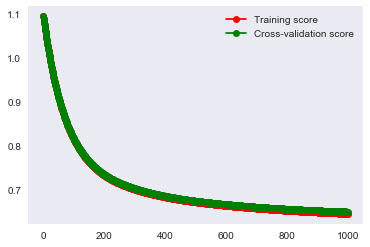

In [43]:
#plt.gca().invert_yaxis()
plt.grid()

#plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
 #                train_scores_mean + train_scores_std, alpha=0.1,
  #               color="r")
#plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 #test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(xcv.index, xcv['train-mlogloss-mean'], 'o-', color="r",
         label="Training score")
plt.plot(xcv.index, xcv['test-mlogloss-mean'], 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [45]:
preds = final_gb.predict(xgb.DMatrix(data=Xtest))


In [46]:
#preds = grid_result.predict_proba(Xtest)
#preds = final_gb.predict(Xtest)
#xcv.predict_proba
preds = pd.DataFrame(preds)
cols = ['high', 'medium', 'low']
preds.columns = cols
preds['listing_id'] = Xtest.index

preds.to_csv('E:/rentalProject/submission.csv', index=None)
preds

,high,medium,low,listing_id
0,0.517186,0.293276,0.189538,7142618
1,0.495790,0.299435,0.204775,7210040
2,0.560909,0.238607,0.200484,7174566
3,0.570077,0.262399,0.167524,7191391
4,0.497426,0.298463,0.204110,7171695
5,0.585428,0.238136,0.176436,7225206
6,0.494086,0.300204,0.205710,7200075
7,0.428012,0.336742,0.235247,7145074
8,0.601296,0.217485,0.181218,7193645
9,0.619107,0.212712,0.168181,7147703


In [96]:
submission = pd.DataFrame({
        "listing_id": X_val.index,
        "high": y_val_pred[:,0],
        "medium":y_val_pred[:,2],
        "low":y_val_pred[:,1]
    })
    
columnsTitles=["listing_id","high","medium","low"]
submission=submission.reindex(columns=columnsTitles)
submission.to_csv('submission.csv', index=False)